<div id="toc"></div>

In [2]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')



<IPython.core.display.Javascript object>

# Goal: Keep plotting tools handy
Patricia Schuster, UM, Jan 2017

I'm going to keep a few convenient plotting functions on here for my own reference. Extensive documentation for pyplot is here: <http://matplotlib.org/api/pyplot_api.html>

# Import Modules
I generally require the following modules:

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import os

# Useful subfunctions

In [4]:
def save_fig_to_folder(fig_filename,fig_folder='fig'):
    """
    Summary: Save .png of current matplotlib plot to fig_folder / fig_filename
    Code will check to make sure fig_folder exists. If not, create folder then save .png to folder
    
    Require: fig_filename
    Modify: fig_folder, set to folder name, or to None to save to cwd
    Effect: Saves figure to file in fig_folder    
    """
    # If saving to same folder
    if fig_folder == None:
        plt.savefig(fig_filename)
    # If saving to a subfolder
    else:
        try:
            os.stat(fig_folder)
        except:
            os.mkdir(fig_folder)
        plt.savefig(fig_folder+'/'+fig_filename)  

# Basic plot properties

## Customize line and marker style
Make it beautiful

Marker styles: <http://matplotlib.org/api/markers_api.html#module-matplotlib.markers>
- ”.”    point
- ”,”    pixel
- “o”    circle
- “v”    triangle_down
- “^”    triangle_up
- “<”    triangle_left
- “>”    triangle_right
- “1”    tri_down
- “2”    tri_up
- “3”    tri_left
- “4”    tri_right
- “8”    octagon
- “s”    square
- “p”    pentagon
- “*”    star
- “h”    hexagon1
- “H”    hexagon2
- “+”    plus
- “x”    x
- “D”    diamond
- “d”    thin_diamond

Line styles: <http://matplotlib.org/api/lines_api.html>
- '-' or 'solid'     solid line
- '--' or 'dashed'   dashed line
- '-.' or 'dashdot'  dash-dotted line
- ':' or 'dotted'    dotted line
- 'None'             draw nothing
- ' '                draw nothing
- ''                 draw nothing

Colors: <http://matplotlib.org/api/colors_api.html>
- b: blue
- g: green
- r: red
- c: cyan
- m: magenta
- y: yellow
- k: black
- w: white
- HTML color picker: <http://www.w3schools.com/colors/colors_picker.asp>

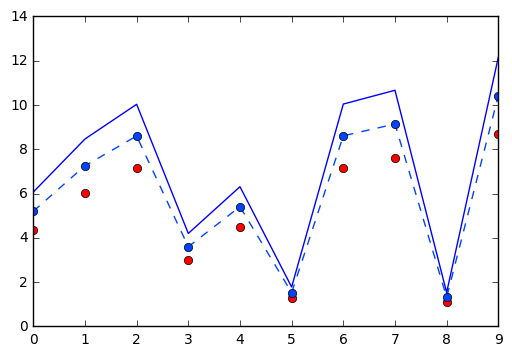

In [2]:
N = 10;
y = 10*np.random.rand(N)

plt.plot(y,'or')
plt.plot(y*1.2,'--o',color ='#0044ff')
plt.plot(y*1.4,)
plt.show()

## Modify axes range, scale
Set limits for x- and y-axes, change scale to log or linear

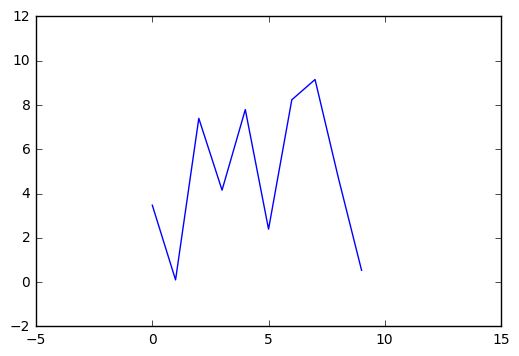

In [149]:
# Generate random data
N = 10;
y = 10*np.random.rand(N)

# Modify x- and y-axes ranges
plt.plot(y)
plt.xlim([-5,15])
plt.ylim([-2,12])
plt.show()

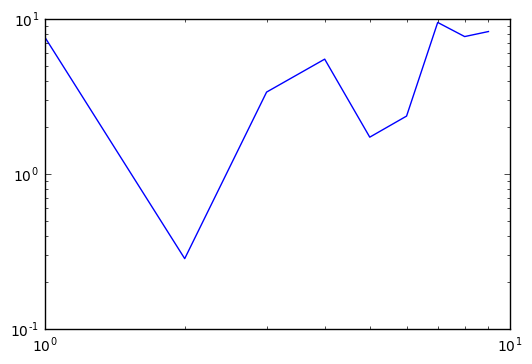

In [148]:
# Modify x- and y-scales for log-scale view
plt.plot(y)
plt.yscale('log')
plt.xscale('log')
plt.show()

## Labels, titles, etc. 

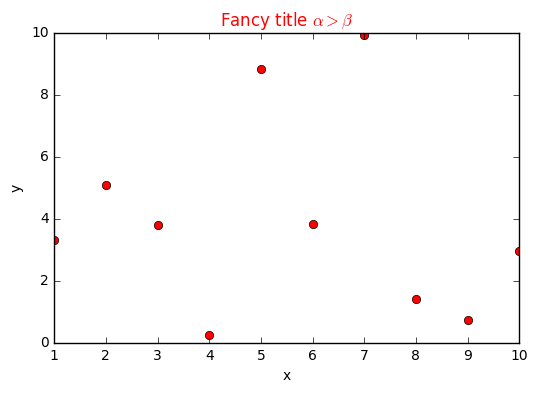

In [3]:
N = 10;
x = np.arange(0,N)
y = 10*np.random.rand(N)

plt.plot(x+1,y,'or')
plt.xlabel('x')
plt.ylabel('y')
plt.title(r'Fancy title $\alpha > \beta$',color='r') # Include the 'r' at the beginning of the title for Latex style
plt.show()


## Colormaps

Here are a few pages that explore colormaps:  
<https://bids.github.io/colormap/>  
<https://matplotlib.org/users/colormaps.html>



Try a few out here.

In [16]:
N = 100
x_values = np.arange(0,N)
y_values = np.ones(N)
c_values = np.arange(0,N)

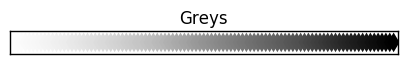

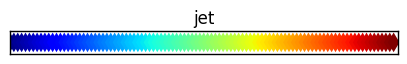

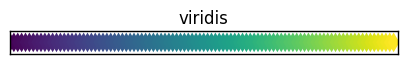

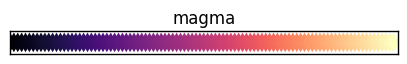

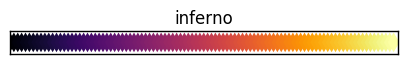

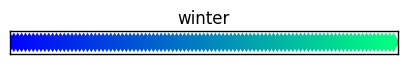

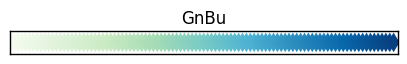

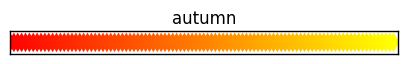

In [31]:
cmaps = ["Greys","jet","viridis","magma","inferno","winter",'GnBu','autumn']

for cmap in cmaps:
    plt.figure(figsize=(5,.3))
    plt.scatter(x_values,y_values,c=c_values,marker='d',s=100,edgecolor='none',cmap = cmap)
    plt.xlim([0,100])
    plt.ylim([.95,1.05])
    plt.title(cmap)
    
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    frame1.axes.get_yaxis().set_visible(False)
    
    plt.show()

# More advanced plots

## Scatter plots

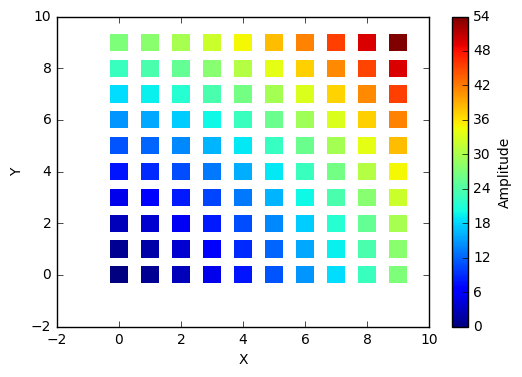

In [10]:
N = 10

x_values = np.arange(0,N)
y_values = np.arange(0,N)

X, Y = np.meshgrid(x_values,y_values)

amplitude = np.random.rand(N, N)
amplitude = X**1.5 + Y**1.5

plt.scatter(X, Y, c=amplitude, s=150, marker='s', edgecolor = 'none', cmap='jet')
cbar = plt.colorbar()
cbar.set_label('Amplitude')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

## Errorbars
There is a `matplotlib.pyplot` function for generating a plot with error bars called `errorbar`. Start with that.

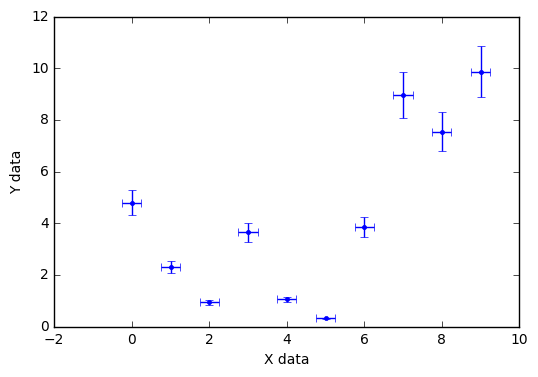

In [12]:
# If x has constant err = 0.25 and y has 10% relative error
N = 10;
x = np.arange(0,N)
x_err = 0.25
y = 10*np.random.rand(N)
y_err = 0.1*y

plt.errorbar(x,y,xerr=x_err,yerr=y_err,fmt='.')
plt.xlabel('X data')
plt.ylabel('Y data')
plt.show()

Another option is to add error bars to an existing plot. Try that using the same function `errorbar`.

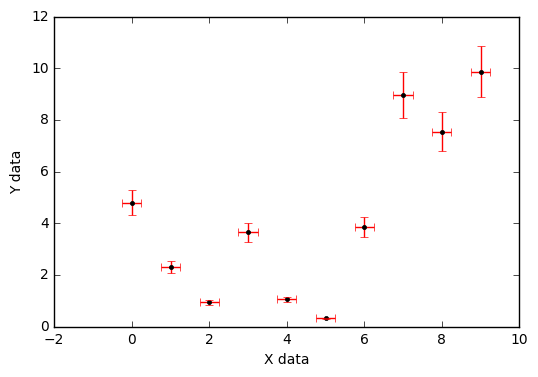

In [20]:
plt.plot(x,y,'.k')
plt.errorbar(x,y,xerr=x_err,yerr=y_err,fmt='none',ecolor='r')
plt.xlabel('X data')
plt.ylabel('Y data')
plt.show()

There are also methods for adding error bars to other plot types, such as a bar plot.

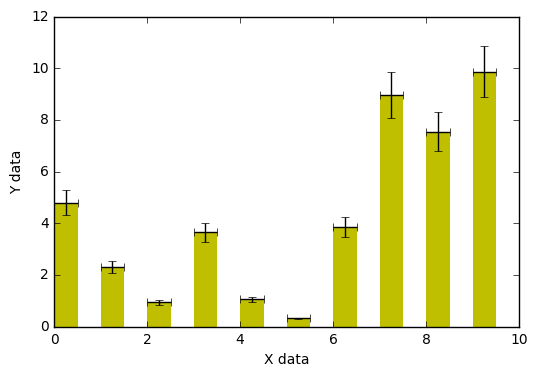

In [29]:
plt.bar(x, y, width = 0.5, color = 'y', edgecolor = 'none', xerr = x_err, yerr = y_err, ecolor = 'k')
plt.xlabel('X data')
plt.ylabel('Y data')
plt.show()

## Bar graphs
Make a super fancy bar graph. Three different data sets on top of each other!

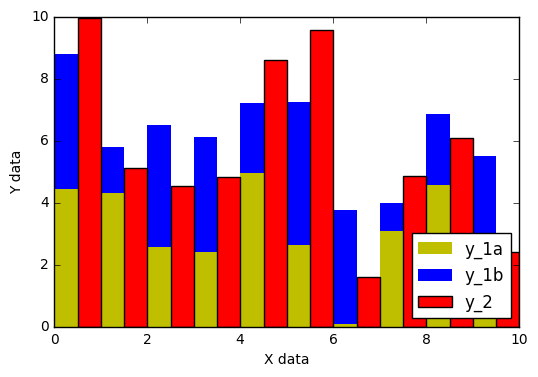

In [37]:
N = 10;
x = np.arange(0,N)
y_1a = 5*np.random.rand(N)
y_1b = 5*np.random.rand(N)
y_2  = 10*np.random.rand(N)

plt.bar(x, y_1a, width = 0.5, color = 'y', edgecolor = 'none')
plt.bar(x, y_1b, width = 0.5, bottom = y_1a, color = 'b', edgecolor = 'none')
plt.bar(x+.5, y_2, width = 0.5, color = 'r')
plt.xlabel('X data')
plt.ylabel('Y data')
plt.legend(['y_1a','y_1b','y_2'],loc=4)
plt.show()

# Multiple plots on same axes

## Two curves on same plot with legend
How do I hold the plot so that I can put multiple plots on the same axes? In MATLAB I would call `hold on` and `hold off`, but it seems that in Python I just need to run multiple `plt.plot()` commands and then call `plt.show()` to display all at once. In order to clear the plots, use `plt.cla()`.

In [43]:
# Generate random data on two different scales
N = 10;
x = np.arange(1,N+1)
y1 = 10*np.random.rand(N)
y2 =    np.random.rand(N)

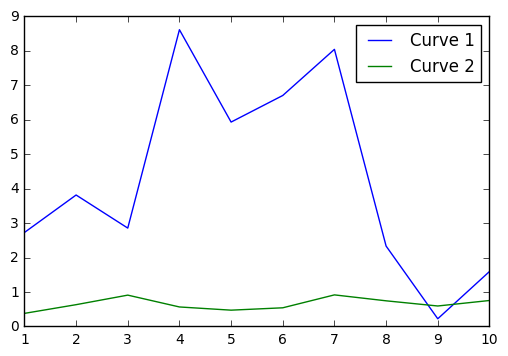

In [81]:
# Make a simple plot with both data displayed
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(['Curve 1','Curve 2'])
plt.show()

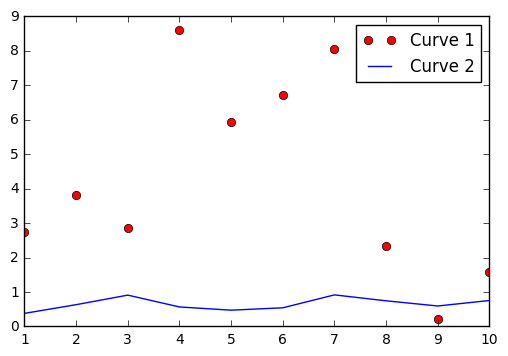

In [82]:
# Try another strategy
plt.plot(x,y1,'ro',x,y2)
plt.legend(['Curve 1','Curve 2'])
plt.show()

## Different y-axes

Same x-axis, different y-axes for plotting two curves on different scales.

In [87]:
# Generate random data on two different scales
N = 100;
x = np.arange(1,N+1)
y1 = 10*np.random.rand(N)
y2 =    np.random.rand(N)

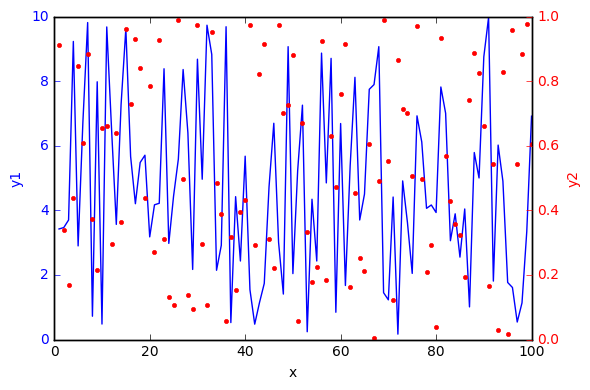

In [88]:
fig, ax1 = plt.subplots()
ax1.plot(x, y1, 'b-')
ax1.set_xlabel('x')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('y1', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(x, y2, 'r.')
ax2.set_ylabel('y2', color='r')
ax2.tick_params('y', colors='r')

fig.tight_layout()
plt.show()

## Subplots

The remaining problem is that the xlabel only exists on the first plot. So this only works when the x-variable is the same for both plots. How do I change that so that I can put a unique xlabel on the first subplot?

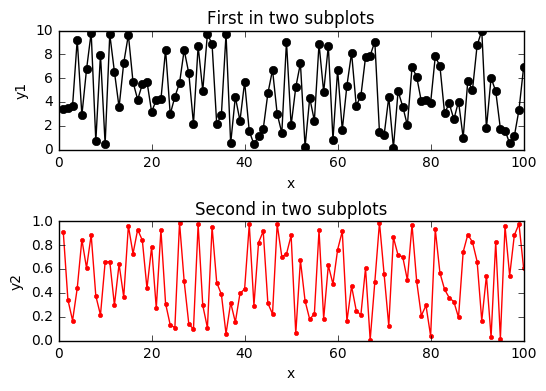

In [122]:
# Syntax: subplot(nrows, ncols, plot_number)
plt.subplot(2, 1, 1)
plt.plot(x, y1, 'ko-')
plt.xlabel('x')
plt.ylabel('y1')
plt.title('First in two subplots')

plt.subplot(2, 1, 2)
plt.plot(x, y2, 'r.-')
plt.xlabel('x')
plt.ylabel('y2')
plt.title('Second in two subplots')

plt.subplots_adjust(wspace=0.4,hspace=0.6) # wspace only affects multi-column subplots
plt.show()


# Histograms

## 1D Histogram

### Use built-in `plt.hist` function on-the-fly

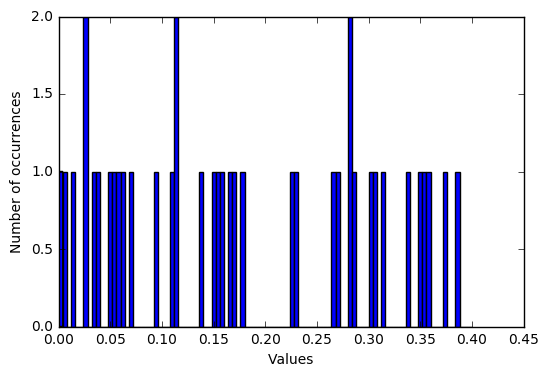

In [6]:
N = 100;
y = np.random.rand(N)

plt.hist(y,bins=100,range=[0,0.4])
plt.xlabel('Values')
plt.ylabel('Number of occurrences')
plt.show()

### Store histogram data using `np.histogram`

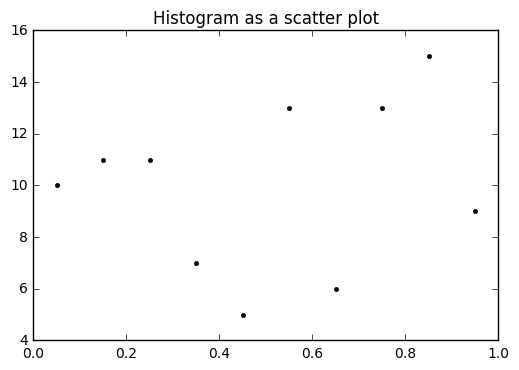

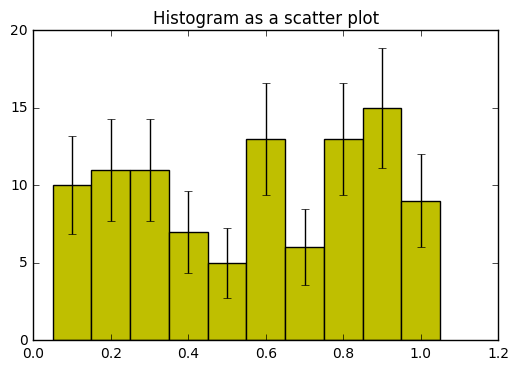

In [20]:
N = 100;
y = np.random.rand(N)

[bins, width] = np.linspace(0,1,11,retstep=True)

[hist, bin_edges] = np.histogram(y, bins=bins)
hist_err = np.sqrt(hist)
bin_centers = (bin_edges[:-1]+bin_edges[1:])/2

plt.plot(bin_centers,hist,'.k')
plt.title('Histogram as a scatter plot')
plt.show()

plt.bar(bin_centers, hist, color = 'y', yerr=hist_err, ecolor='k', width=width)
plt.title('Histogram as a scatter plot')
plt.show()

## 2D Histogram

### Use built-in functions

Try out the `hexbin` function.

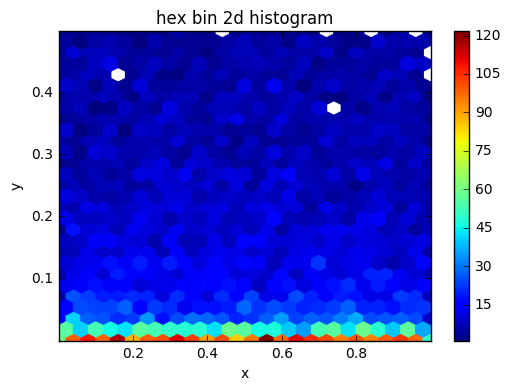

In [4]:
N = 10000;
x = np.random.rand(N)
y = np.random.rand(N)
y = y**3
y = y/2

plt.hexbin(x,y,gridsize = 25,mincnt=1)
plt.xlabel('x')
plt.ylabel('y')
plt.title('hex bin 2d histogram')
plt.colorbar()
plt.show()

Now try pyplot's `hist2d`.

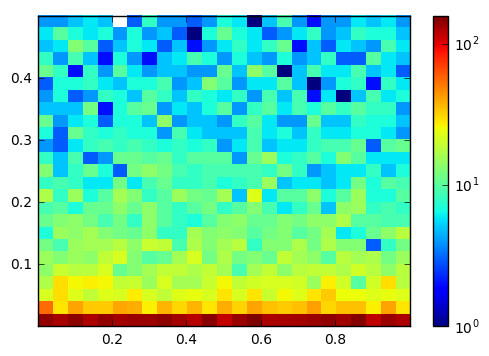

In [5]:
# Make a square-bin 2d histogram with log-scale colorbar
plt.hist2d(x,y,bins=25,norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.show()

# Adding the xlabel messes up placement of the bins somehow...

### Use seaborn's methods `jointplot`

A note about seaborn: As soon as you import seaborn, it overwrites your default matplotlib properties. So if I run the same plots as I ran earlier with seaborn imported, they will look different. For example, run the previous plot again:

In [6]:
import seaborn as sns

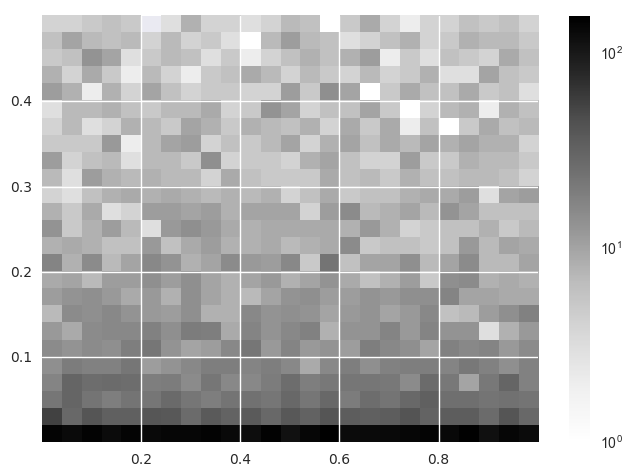

In [7]:
plt.hist2d(x,y,bins=25,norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.show()

Regardless, seaborn has some really nice built-in plots that we can take advantage of.

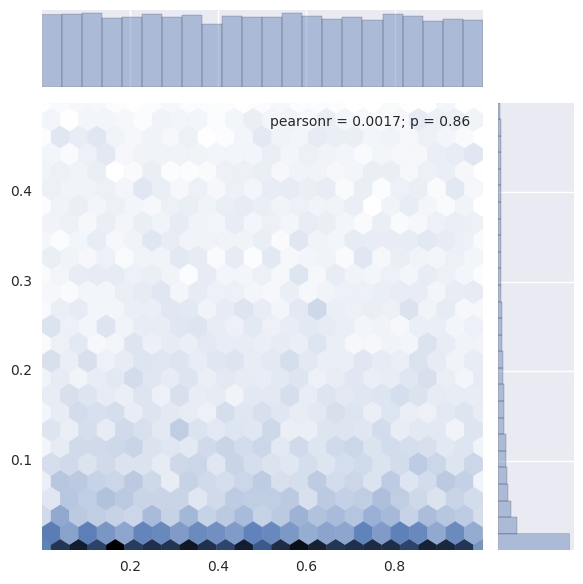

In [12]:
sns.jointplot(x, y, kind='hex')
plt.show()

## Store the `counts` data and plot after the fact

### Using `np.histogram2d`

Use `np.histogram2d` to store the counts, then plot with `meshgrid` and `pcolormesh`.

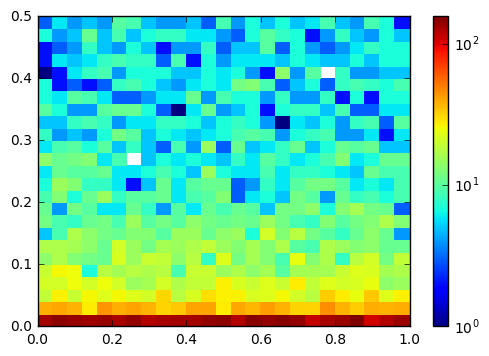

In [7]:
N = 10000;
x = np.random.rand(N)
y = np.random.rand(N)
y = y**3
y = y/2

# Save counts to a variable- use numpy instead of plt.hist2d so as not to create a plt object
# Note that x- and y-axes are flipped
counts, y_edges, x_edges = np.histogram2d(y, x, bins=25)

X,Y = np.meshgrid(x_edges,y_edges)
plt.pcolormesh(X, Y, counts, norm=matplotlib.colors.LogNorm()) # pcolormesh faster than pcolor
plt.colorbar()
plt.show()
# Note: Empty bins show up as white

If I am not using `LogNorm`, there are other ways of achieving white color in zero bins. Here are two ways:

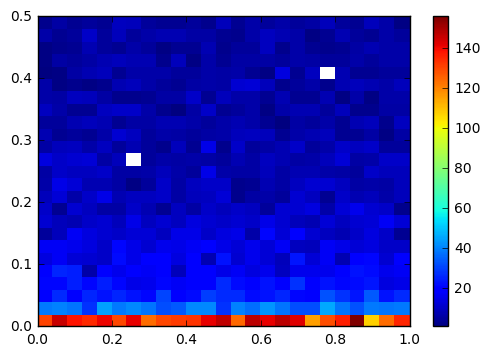

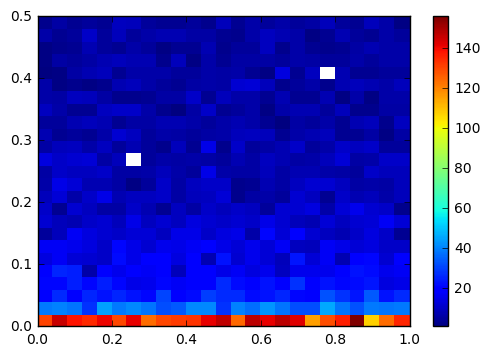

In [8]:
# Manipulate the colormap
cmap = plt.cm.jet
cmap.set_under(color='white')

plt.pcolormesh(X, Y, counts, cmap=cmap, vmin=1) # pcolormesh faster than pcolor
plt.colorbar()
plt.show() 

# Use `Normalize()` with vmin=1
plt.pcolormesh(X, Y, counts, norm=matplotlib.colors.Normalize(vmin=1)) # pcolormesh faster than pcolor
plt.colorbar()
plt.show()

## Use seaborn's method `heatmap`

In [9]:
import seaborn as sns

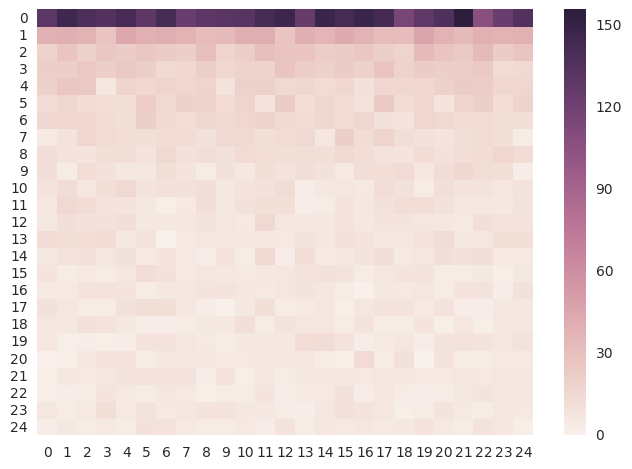

In [17]:
sns.heatmap(counts)

plt.show()

The first thing to note is that the data is upside down compared to previously. So take special note of how heatmap displays the data.

# Save to file
The command is `plt.savefig('figname.png')`

In [2]:
plt.plot([1,2,3,4,5],[2,4,6,8,10],'ok')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Just a plot')
plt.savefig('simple_plot.png')
# You can call plt.show() after plt.savefig(), but not the other way around or else you will save an empty plot

Generally, I like to save figures into a subfolder called `fig` within my main analysis folder. I'm going to make myself a function that will automate that process. I want it to:

* Take as input: Filename, folder name in which I will store my figure
* If no folder name is provided, by default store it in `fig`
* If folder name is set to `None`, then save it in the same folder instead of a sub folder.

This subfunction is defined at the beginning of this notebook.

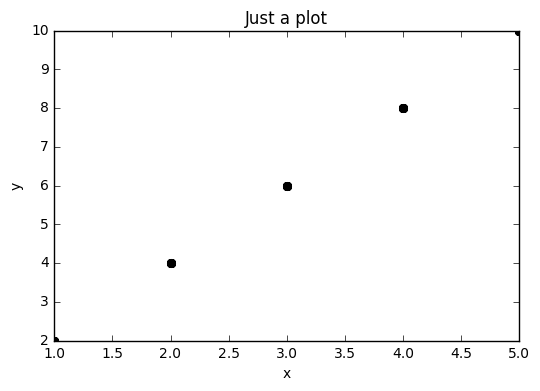

In [16]:
plt.plot([1,2,3,4,5],[2,4,6,8,10],'ok')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Just a plot')
save_fig_to_folder('simple_plot.png',None)
plt.show()

In [18]:
os.listdir()

['.git',
 '.ipynb_checkpoints',
 'python_plotting_cheat_sheet.html',
 'python_plotting_cheat_sheet.ipynb',
 'simple_plot.png']

In [21]:
# Or just save it to file and clear the plot
plt.plot([1,2,3,4,5],[2,4,6,8,10],'ok')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Just a plot')
save_fig_to_folder('simple_plot.png')
plt.clf()

In [22]:
os.listdir('fig')

['simple_plot.png']

# Other ideas

Aaron Bevill says I can use a matplotlib rc file to set default plotting settings.

I need to figure out how to animate plots.